In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import re
import json

In [28]:
path = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/GithubRepos/coder/Experiments/" #CV_Anserini_TasB_2023-05-06_11-01-45_0Li"
pathcongater = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/dev/"
bias_regul_coeff = []
dir_list = []
df_res = pd.DataFrame()

best_step_l = []

#take the last step instead of best


df = pd.read_excel(os.path.join(path, "MDST_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
dfcongater = pd.read_excel(os.path.join(pathcongater, "Congater_dev_numlayers2_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
dfcongater

,Timestamp,w,Best MRR@10,Best NFaiRR_cutoff_10
0,2023-09-15_16-07-54,0.0,0.238976,0.901901
1,2023-09-15_16-07-54,0.1,0.236048,0.904540
2,2023-09-15_16-07-54,0.2,0.232095,0.907366
3,2023-09-15_16-07-54,0.3,0.232556,0.912476
4,2023-09-15_16-07-54,0.4,0.229998,0.916749
5,2023-09-15_16-07-54,0.5,0.225312,0.922373
6,2023-09-15_16-07-54,0.6,0.210895,0.928766
7,2023-09-15_16-07-54,0.7,0.204594,0.934814
8,2023-09-15_16-07-54,0.8,0.207650,0.941866
9,2023-09-15_16-07-54,0.9,0.201250,0.952272


In [6]:
experiment_name = "CV_Anserini_TasB_dev"
path_settings = os.path.join(path, experiment_name)
for dir in os.listdir(path_settings):
    df_conf = pd.read_json(os.path.join(path_settings,dir, "configuration.json"))
    bias_regul_coeff.append(df_conf["bias_regul_coeff"].iloc[0])
    dir_list.append(str(dir)[len(experiment_name)+1:-4])

In [7]:
df_config = pd.DataFrame()
df_config["Timestamp"] = dir_list
df_config["bias_regul_coeff"] = bias_regul_coeff
df_config

,Timestamp,bias_regul_coeff
0,2023-05-27_21-21-37,0
1,2023-05-27_21-43-02,1
2,2023-05-27_21-49-48,2
3,2023-05-27_21-55-38,5
4,2023-05-27_22-00-45,10
5,2023-05-27_22-16-22,15
6,2023-05-27_22-36-24,20


In [8]:
df = df_config.merge(df, on = "Timestamp")
df

,Timestamp,bias_regul_coeff,Best MRR@10,Best NFaiRR_cutoff_10
0,2023-05-27_21-21-37,0,0.235591,0.904634
1,2023-05-27_21-43-02,1,0.229252,0.914143
2,2023-05-27_21-49-48,2,0.224533,0.920966
3,2023-05-27_21-55-38,5,0.181368,0.945704
4,2023-05-27_22-00-45,10,0.144280,0.954500
5,2023-05-27_22-16-22,15,0.106908,0.967550
6,2023-05-27_22-36-24,20,0.075502,0.971946


Text(0, 0.5, 'MRR@10')

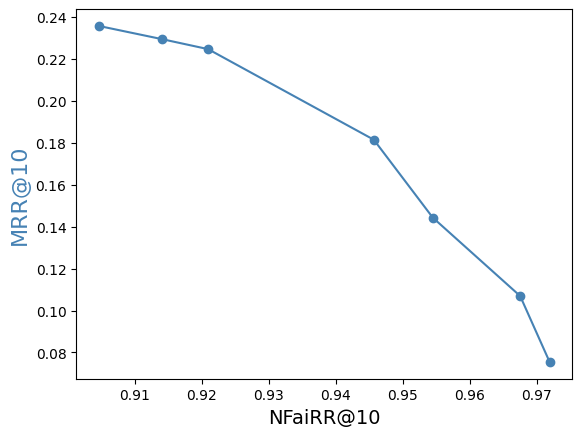

In [9]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df["Best NFaiRR_cutoff_10"], df['Best MRR@10'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('NFaiRR@10', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', color=col1, fontsize=16)

Text(0, 0.5, 'NFaiRR@10')

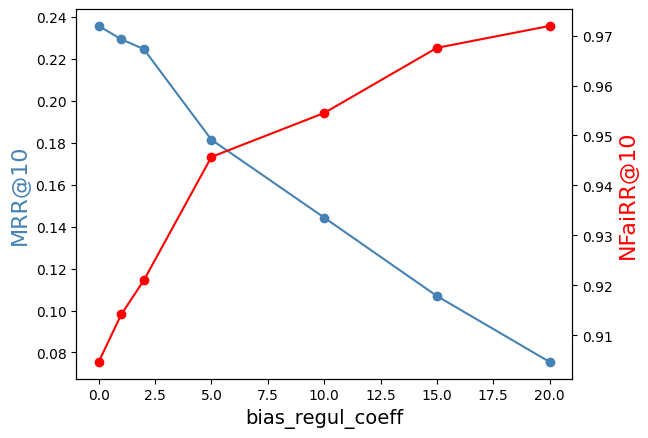

In [10]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df["bias_regul_coeff"], df['Best MRR@10'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('bias_regul_coeff', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(df["bias_regul_coeff"], df['Best NFaiRR_cutoff_10'], color=col2, marker = "o")

#add second y-axis label
ax2.set_ylabel('NFaiRR@10', color=col2, fontsize=16)

Text(0, 0.5, 'NFaiRR@10')

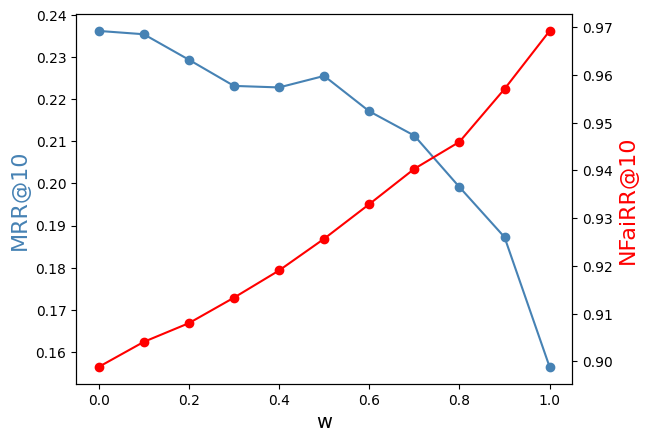

In [6]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(dfcongater["w"], dfcongater['Best MRR@10'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('w', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(dfcongater["w"], dfcongater['Best NFaiRR_cutoff_10'], color=col2, marker = "o")

#add second y-axis label
ax2.set_ylabel('NFaiRR@10', color=col2, fontsize=16)

In [3]:
pathcongater = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/dev/"
bias_regul_coeff = []
dir_list = []
df_res = pd.DataFrame()

best_step_l = []

#take the last step instead of best


dfinterpolation = pd.read_excel(os.path.join(pathcongater, "Interpolate_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
dfinterpolation = dfinterpolation.sort_values("w")

Text(0, 0.5, 'MRR@10')

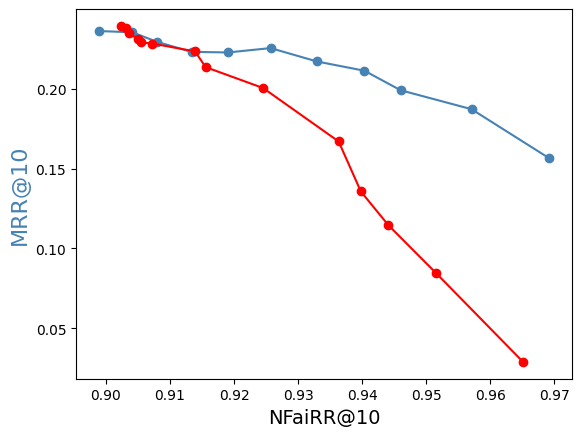

In [6]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'], color=col1, marker = "o")

ax.plot(dfinterpolation["Best NFaiRR_cutoff_10"], dfinterpolation['Best MRR@10'], color=col2, marker = "o")
#add x-axis label
ax.set_xlabel('NFaiRR@10', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', color=col1, fontsize=16)

### Interpolation model
Interpolation between debiasing adapter and task adapter in the last layer and in all layers.

In [1]:
pathcongater = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/dev/"
bias_regul_coeff = []
dir_list = []
df_res = pd.DataFrame()

best_step_l = []

#take the last step instead of best


dfinterpolation = pd.read_excel(os.path.join(pathcongater, "Interpolate_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
dfinterpolation = dfinterpolation.sort_values("w")


#read interpolation experiments
config_lst = []
config_par = 'interpolate_position'
for dir in os.listdir(pathcongater):
    if "Interpolate_dev" in dir:
        experiment_timestamp = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+)',dir).group(1)
        df_conf = json.load(open(os.path.join(pathcongater,dir, "configuration.json")))
        config_lst.append([experiment_timestamp, df_conf[config_par]])
config_df = pd.DataFrame(config_lst, columns=["experiment", config_par])
dfinterpolation = dfinterpolation.merge(config_df, left_on="Timestamp", right_on="experiment")


dfinterpolation

NameError: name 'pd' is not defined

In [9]:
dfinterpolation_summary = dfinterpolation.groupby(["interpolate_position","w"],as_index=False).agg(
    MRRMean=('Best MRR@10', np.mean),
    MRRStd=('Best MRR@10', np.std),
    NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
    NFairrStd=('Best NFaiRR_cutoff_10', np.std),
    Count=('Best MRR@10', 'count'))
dfinterpolation_summary

,interpolate_position,w,MRRMean,MRRStd,NFairrMean,NFairrStd,Count
0,all,0.00,0.229274,0.001860,0.898554,0.002426,2
1,all,0.10,0.230414,0.000557,0.898734,0.001356,2
2,all,0.20,0.229631,0.003336,0.898983,0.000936,2
3,all,0.30,0.226123,0.002659,0.896247,0.007032,2
4,all,0.40,0.218431,0.002488,0.897857,0.008527,2
5,all,0.50,0.199293,0.001655,0.900564,0.009111,2
6,all,0.60,0.170399,0.004082,0.900253,0.007329,2
7,all,0.70,0.148709,0.001641,0.909683,0.013685,2
8,all,0.80,0.111719,0.006094,0.922705,0.011465,2
9,all,0.90,0.072480,0.002424,0.940867,0.008048,2


### Congater results

In [10]:
dfcongater = pd.read_excel(os.path.join(pathcongater, "Congater_dev_numlayers2_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
dfcongater = dfcongater.sort_values("w")
dfcongater_summary = dfcongater.groupby(["w"],as_index=False).agg(
    MRRMean=('Best MRR@10', np.mean),
    MRRStd=('Best MRR@10', np.std),
    NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
    NFairrStd=('Best NFaiRR_cutoff_10', np.std),
    Count=('Best MRR@10', 'count'))
dfcongater_summary

,w,MRRMean,MRRStd,NFairrMean,NFairrStd,Count
0,0.0,0.234989,0.003507,0.903597,0.001469,3
1,0.1,0.234644,0.002343,0.906024,0.001323,3
2,0.2,0.232191,0.000930,0.908438,0.001095,3
3,0.3,0.227913,0.004482,0.912656,0.001261,3
4,0.4,0.227357,0.002635,0.917501,0.000819,3
5,0.5,0.223042,0.003694,0.922762,0.000921,3
6,0.6,0.213465,0.005391,0.929198,0.000705,3
7,0.7,0.209420,0.004201,0.935814,0.000886,3
8,0.8,0.208914,0.001948,0.942408,0.000469,3
9,0.9,0.201547,0.002174,0.952073,0.000478,3


### Adapter results

In [11]:
#read adapter experiments
df_adapter = pd.DataFrame()
for dir in os.listdir(os.path.join(pathcongater, "adapter")):
    if "xls" in dir:
        print(dir)
        df = pd.read_excel(os.path.join(pathcongater, "adapter", dir), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10'], convert_float= False)
        df = df[["Best MRR@10","Best NFaiRR_cutoff_10"]].agg(
                    [np.mean
                    ,np.std
                    ,'count']
                    ).reset_index()
        df["experiment"] = dir
        df_adapter = pd.concat([df_adapter,df])
df_adapter

adapter_bias_regul_coeff=10_dev.xls
adapter_bias_regul_coeff=15_dev.xls
adapter_bias_regul_coeff=1_dev.xls
adapter_bias_regul_coeff=2_dev.xls
adapter_bias_regul_coeff=5_dev.xls
adapter_debias_dev.xls
adapter_task_dev.xls


,index,Best MRR@10,Best NFaiRR_cutoff_10,experiment
0,mean,0.082385,0.948275,adapter_bias_regul_coeff=10_dev.xls
1,std,NaN,NaN,adapter_bias_regul_coeff=10_dev.xls
2,count,1.000000,1.000000,adapter_bias_regul_coeff=10_dev.xls
0,mean,0.046072,0.959479,adapter_bias_regul_coeff=15_dev.xls
1,std,NaN,NaN,adapter_bias_regul_coeff=15_dev.xls
2,count,1.000000,1.000000,adapter_bias_regul_coeff=15_dev.xls
0,mean,0.226312,0.911187,adapter_bias_regul_coeff=1_dev.xls
1,std,NaN,NaN,adapter_bias_regul_coeff=1_dev.xls
2,count,1.000000,1.000000,adapter_bias_regul_coeff=1_dev.xls
0,mean,0.206043,0.924683,adapter_bias_regul_coeff=2_dev.xls


In [12]:
df_adapter[df_adapter["index"]=='mean']

,index,Best MRR@10,Best NFaiRR_cutoff_10,experiment
0,mean,0.082385,0.948275,adapter_bias_regul_coeff=10_dev.xls
0,mean,0.046072,0.959479,adapter_bias_regul_coeff=15_dev.xls
0,mean,0.226312,0.911187,adapter_bias_regul_coeff=1_dev.xls
0,mean,0.206043,0.924683,adapter_bias_regul_coeff=2_dev.xls
0,mean,0.149395,0.933576,adapter_bias_regul_coeff=5_dev.xls
0,mean,0.023920,0.965194,adapter_debias_dev.xls
0,mean,0.230671,0.898791,adapter_task_dev.xls


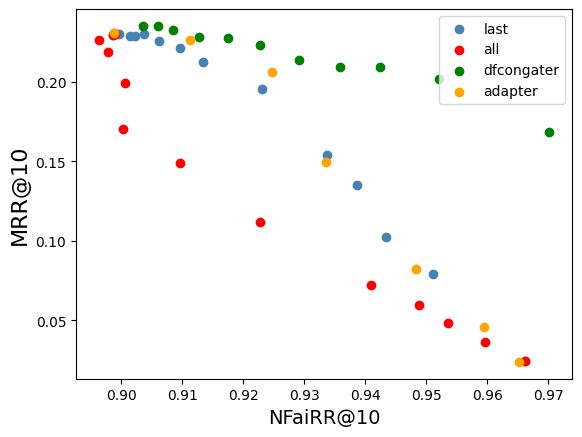

In [13]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
col4 = 'orange'

dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary[config_par] == 'last'].sort_values("w")
dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary[config_par] == 'all'].sort_values("w")
dfadaptermean = df_adapter[df_adapter["index"]=='mean']
#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'], color=col1, marker = "o")

ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'], color=col2, marker = "o")

ax.scatter(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], color=col3, marker = "o")

ax.scatter(dfadaptermean["Best NFaiRR_cutoff_10"], dfadaptermean['Best MRR@10'], color=col4, marker = "o")
#add x-axis label
ax.set_xlabel('NFaiRR@10', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', fontsize=16)

ax.legend([dfinterpolatelast[config_par].iloc[0], dfinterpolateall[config_par].iloc[0], 'dfcongater','adapter'])

In [ ]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
col4 = 'orange'

#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.plot(df["bias_regul_coeff"], df['Best MRR@10'], color=col1, marker = "o")
#add x-axis label
ax.set_xlabel('bias_regul_coeff', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(df["bias_regul_coeff"], df['Best NFaiRR_cutoff_10'], color=col2, marker = "o")

#add second y-axis label
ax2.set_ylabel('NFaiRR@10', color=col2, fontsize=16)

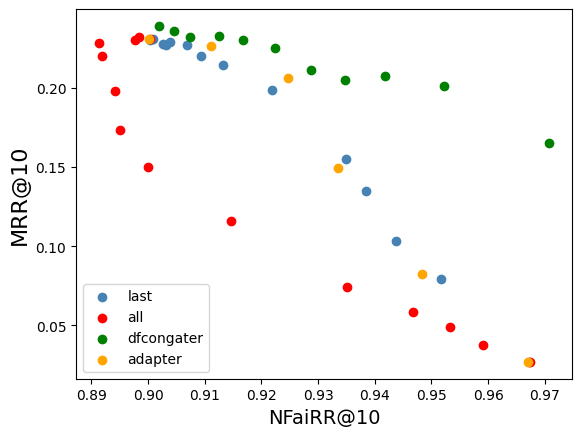

In [14]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
col4 = 'orange'

dfexperiment1 = dfinterpolation[dfinterpolation[config_par] == 'last'].sort_values("w")
dfexperiment2 = dfinterpolation[dfinterpolation[config_par] == 'all'].sort_values("w")
#define subplots
fig,ax = plt.subplots()
#add first line to plot
ax.scatter(dfexperiment1["Best NFaiRR_cutoff_10"], dfexperiment1['Best MRR@10'], color=col1, marker = "o")

ax.scatter(dfexperiment2["Best NFaiRR_cutoff_10"], dfexperiment2['Best MRR@10'], color=col2, marker = "o")

ax.scatter(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'], color=col3, marker = "o")

ax.scatter(df_adapter["Best NFaiRR_cutoff_10"], df_adapter['Best MRR@10'], color=col4, marker = "o")
#add x-axis label
ax.set_xlabel('NFaiRR@10', fontsize=14)
#add y-axis label
ax.set_ylabel('MRR@10', fontsize=16)

ax.legend([dfexperiment1[config_par].iloc[0], dfexperiment2[config_par].iloc[0], 'dfcongater','adapter'])